In [2]:
!pip install execfile

ERROR: Could not find a version that satisfies the requirement execfile (from versions: none)
ERROR: No matching distribution found for execfile


In [25]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [6]:
import hopfield 
# reload(hopfield)
# import multiprocessing
import random as rand
import numpy as np
import matplotlib.pyplot as plt
# import pylab as pl
import time

FLAG_progress = False # Show process progress (True or False)
FLAG_plot = False

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')

# -------------------------------------
# -------------------------------------
# -------------------------------------

start = time.time()

# Exercise 1

print('\nEXERCISE 1\n===========\n')

# Run
K = 10  # Number of times the algorithm is run for cross-validations

# Network size
N = 100 # size of the network, i.e. if N=10 it will consists of 10x10 pixels

# Random patterns
P = range(1,30+1,1) # Total number of patterns that will be stored
ratio = 0.5 # probability of a pixel being 1 instead of -1

# Updates
decay = 1.0

# Steps
Z = 1000 # Number of storage/recall iterations
c = 5

# Storage and recalls
P_s = 0.8 # Probability ps for storage
P_f = 0.1 # ratio of flipped pixels


EXERCISE 1



In [7]:
# Hopfield project
# Exercise 1
# Arreguit Jonathan & Bronner Timothee

# Find the maximum dictionary size p_max the network can handle, without the error exceeding 0.05

from scipy.optimize import curve_fit, minimize, basinhopping

# Results storage
Results_P_errors = np.array([[[None,None] for i in range(len(P))] for j in range(K)])
P_errors = [[None for i in range(len(P))] for j in range(K)] # For plot
P_success = [[None for i in range(len(P))] for j in range(K)]
Mean_P_error = [None for i in range(len(P))]
Std_P_error = [None for i in range(len(P))]
Results = np.zeros((K,len(P)))

# Creation fo a NxN pixel Hopfield network
hn = hopfield.hopfield_network(N=N,c=c,plot=FLAG_plot)

In [8]:
for k in range(K): # Number of iterations
    P_n = 0 #  Counter for number of patterns tested
    for p in P:
        # Create P patterns
        hn.make_pattern(P=p,ratio=ratio)
        print('ITERATION:', k+1,'/',K)
        print('NUMBER OF PATTERNS', p)
        weight_mem = [] # Storage of the weight matrix over Z*c updates. This is only used to analyse the impact of modifying the diagonal of the weights matrix, mentionned in the appendix of the report
        distance_mem = [] # Storage of the Hamming distance at each recall. This is only used to analyse the impact of modifying the diagonal of the weights matrix, mentionned in the appendix of the report

        for z in range(Z):
            if FLAG_progress and z%(Z/10) == 0:
                print(100.0*z/Z, '%')
                loading = 0
            weight_mem.append(hn.weight)
            if rand.randint(0,1000)/1000.0 < P_s: # Storage
                mu = rand.randint(0,hn.count_patterns()-1)
                for r in range(c):
                    hn.update_weight(mu=mu,decay=decay)
            else: # Recall
                hn.recall(mu=rand.randint(0,hn.count_patterns()-1), P_f=P_f,decay=decay)
                distance_mem.append([z,hn.distance])
        
        print('RECALLS:', hn.recalls)
        print('ERROR AVERAGE;', 100.0*hn.distance_sum/hn.recalls, '%')
        print('SUCESS RATE:', 100.0*hn.recognition_success/hn.recalls, '%')
        
        # Results storage
        Results_P_errors[k][P_n][0] = p
        Results_P_errors[k][P_n][1] = 1.0*hn.distance_sum/hn.recalls
        Results[k,P_n] = 1.0*hn.distance_sum/hn.recalls
        
        # Plot
        P_errors[k][P_n] = 1.0*hn.distance_sum/hn.recalls
        P_success[k][P_n] = 1.0*hn.recognition_success/hn.recalls
        # hn.plot_error_rate(P=P,error_rate=P_errors,K=K)
        
        P_n += 1
        print() # Next line

ITERATION: 1 / 10
NUMBER OF PATTERNS 1
RECALLS: 207
ERROR AVERAGE; 0.0 %
SUCESS RATE: 100.0 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 2
RECALLS: 202
ERROR AVERAGE; 0.0 %
SUCESS RATE: 100.0 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 3
RECALLS: 187
ERROR AVERAGE; 0.29411764705882343 %
SUCESS RATE: 97.32620320855615 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 4
RECALLS: 197
ERROR AVERAGE; 0.015228426395939073 %
SUCESS RATE: 100.0 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 5
RECALLS: 206
ERROR AVERAGE; 0.22815533980582525 %
SUCESS RATE: 99.51456310679612 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 6
RECALLS: 183
ERROR AVERAGE; 0.5737704918032787 %
SUCESS RATE: 98.36065573770492 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 7
RECALLS: 185
ERROR AVERAGE; 1.108108108108108 %
SUCESS RATE: 96.75675675675676 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 8
RECALLS: 207
ERROR AVERAGE; 1.0869565217391304 %
SUCESS RATE: 95.16908212560386 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 9
RECALLS: 204
ERROR AVERAGE; 1.3333333333333333 %

RECALLS: 216
ERROR AVERAGE; 2.504629629629628 %
SUCESS RATE: 91.66666666666667 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 11
RECALLS: 210
ERROR AVERAGE; 1.3380952380952378 %
SUCESS RATE: 92.85714285714286 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 12
RECALLS: 213
ERROR AVERAGE; 4.1079812206572734 %
SUCESS RATE: 84.03755868544602 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 13
RECALLS: 213
ERROR AVERAGE; 6.6197183098591506 %
SUCESS RATE: 64.78873239436619 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 14
RECALLS: 196
ERROR AVERAGE; 7.459183673469385 %
SUCESS RATE: 60.714285714285715 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 15
RECALLS: 227
ERROR AVERAGE; 3.6828193832599094 %
SUCESS RATE: 79.29515418502203 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 16
RECALLS: 179
ERROR AVERAGE; 5.636871508379885 %
SUCESS RATE: 71.50837988826815 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 17
RECALLS: 205
ERROR AVERAGE; 8.61463414634146 %
SUCESS RATE: 61.46341463414634 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 18
RECALLS: 226
ERROR A

RECALLS: 208
ERROR AVERAGE; 8.091346153846152 %
SUCESS RATE: 52.40384615384615 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 20
RECALLS: 210
ERROR AVERAGE; 10.823809523809528 %
SUCESS RATE: 45.23809523809524 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 21
RECALLS: 193
ERROR AVERAGE; 16.47668393782383 %
SUCESS RATE: 24.870466321243523 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 22
RECALLS: 198
ERROR AVERAGE; 13.080808080808083 %
SUCESS RATE: 42.92929292929293 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 23
RECALLS: 185
ERROR AVERAGE; 15.73513513513514 %
SUCESS RATE: 31.89189189189189 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 24
RECALLS: 203
ERROR AVERAGE; 12.354679802955665 %
SUCESS RATE: 36.94581280788177 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 25
RECALLS: 192
ERROR AVERAGE; 18.072916666666664 %
SUCESS RATE: 27.083333333333332 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 26
RECALLS: 208
ERROR AVERAGE; 25.019230769230766 %
SUCESS RATE: 24.51923076923077 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 27
RECALLS: 209
ERRO

RECALLS: 200
ERROR AVERAGE; 14.715000000000002 %
SUCESS RATE: 37.0 %

ITERATION: 7 / 10
NUMBER OF PATTERNS 29
RECALLS: 198
ERROR AVERAGE; 17.53535353535352 %
SUCESS RATE: 28.282828282828284 %

ITERATION: 7 / 10
NUMBER OF PATTERNS 30
RECALLS: 199
ERROR AVERAGE; 11.944723618090451 %
SUCESS RATE: 39.698492462311556 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 1
RECALLS: 207
ERROR AVERAGE; 0.0 %
SUCESS RATE: 100.0 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 2
RECALLS: 207
ERROR AVERAGE; 0.048309178743961345 %
SUCESS RATE: 99.51690821256038 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 3
RECALLS: 215
ERROR AVERAGE; 0.09302325581395347 %
SUCESS RATE: 99.06976744186046 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 4
RECALLS: 213
ERROR AVERAGE; 0.0 %
SUCESS RATE: 100.0 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 5
RECALLS: 204
ERROR AVERAGE; 0.22058823529411764 %
SUCESS RATE: 99.50980392156863 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 6
RECALLS: 215
ERROR AVERAGE; 0.8093023255813955 %
SUCESS RATE: 98.13953488372093 %

I

RECALLS: 206
ERROR AVERAGE; 1.1310679611650485 %
SUCESS RATE: 95.14563106796116 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 8
RECALLS: 188
ERROR AVERAGE; 3.7446808510638285 %
SUCESS RATE: 77.12765957446808 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 9
RECALLS: 191
ERROR AVERAGE; 2.5916230366492137 %
SUCESS RATE: 89.00523560209425 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 10
RECALLS: 189
ERROR AVERAGE; 5.391534391534389 %
SUCESS RATE: 76.19047619047619 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 11
RECALLS: 203
ERROR AVERAGE; 3.6600985221674884 %
SUCESS RATE: 84.72906403940887 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 12
RECALLS: 208
ERROR AVERAGE; 7.586538461538457 %
SUCESS RATE: 58.65384615384615 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 13
RECALLS: 198
ERROR AVERAGE; 4.005050505050502 %
SUCESS RATE: 85.35353535353535 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 14
RECALLS: 203
ERROR AVERAGE; 8.45812807881773 %
SUCESS RATE: 65.02463054187191 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 15
RECALLS: 191
ER

In [26]:
# Statistics
Mean_P_error = np.mean(P_errors, axis=0)
Std_P_error = np.std(P_errors, axis=0)
Mean_P_success = np.mean(P_success, axis=0)
Std_P_success = np.std(P_success, axis=0)
# ax0.errorbar(p, Mean_P_error, yerr=Std_P_error, fmt='-o')

In [27]:
# Plot of the Hamming distance for each iteration over the number of patterns
plt.figure('Exercise 1 a Distance') # fig_error_rate = 

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Recall error in function of number of patterns obtained from 10 iterations')

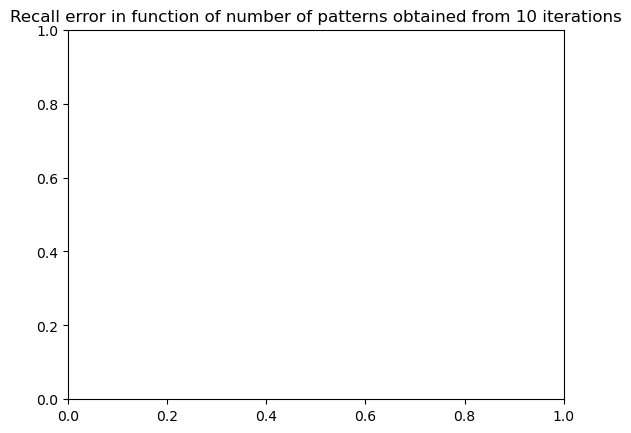

In [28]:
plt.title('Recall error in function of number of patterns obtained from %i iterations'%K)

In [29]:
plot_error_rate = [None]*(K)

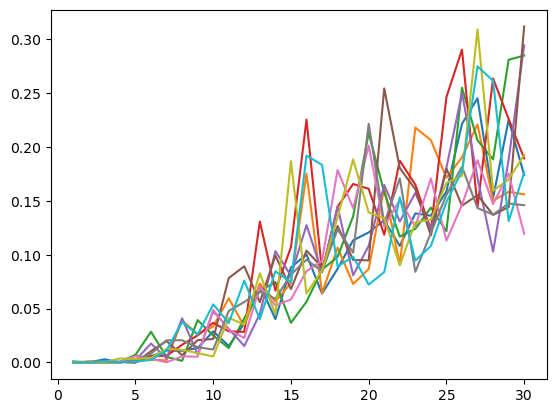

In [30]:
for k in range(K):
    plt.plot(Results_P_errors[k,:,0],Results_P_errors[k,:,1])
    

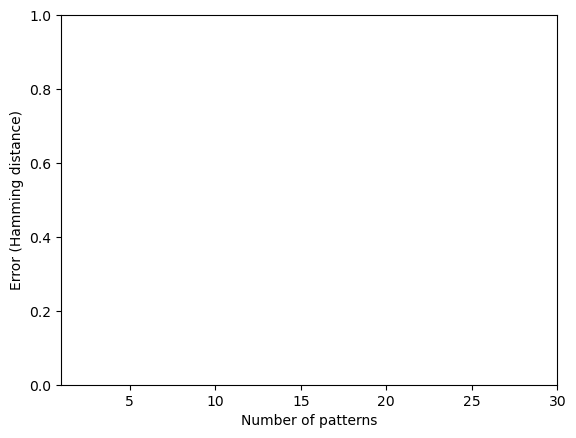

In [31]:
plt.axis([min(P),max(P),0,1])
plt.xlabel('Number of patterns')
plt.ylabel('Error (Hamming distance)')
plt.show(block=False)

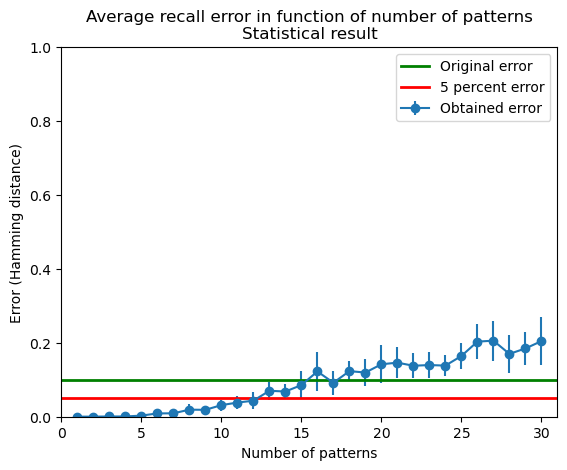

In [32]:
# Plot of the mean of the Hamming distance for K iterations over the number of patterns
plt.figure('Exercise 1b Error')
plt.title('Average recall error in function of number of patterns\nStatistical result')
plt.plot([min(P)-1,max(P)+1],[0.1,0.1],'g',linewidth=2)
plt.plot([min(P)-1,max(P)+1],[0.05,0.05],'r',linewidth=2)
plt.errorbar(P, Mean_P_error, yerr=Std_P_error, fmt='-o')
plt.axis([min(P)-1,max(P)+1,0,1])
plt.xlabel('Number of patterns')
plt.ylabel('Error (Hamming distance)')
plt.legend(['Original error','5 percent error','Obtained error'])
plt.show(block=False)

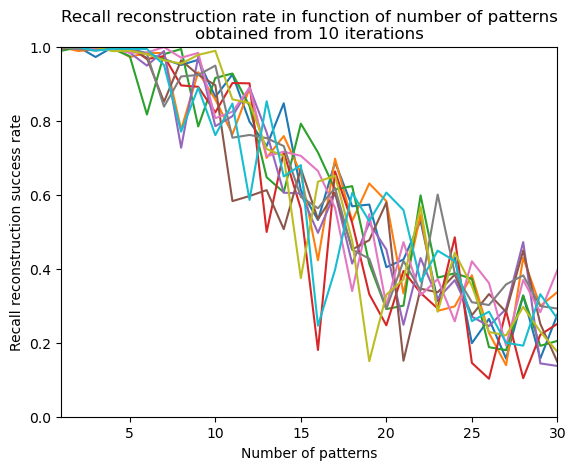

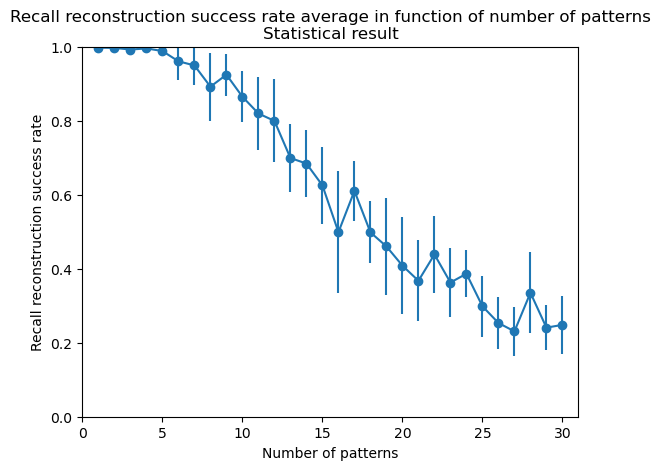

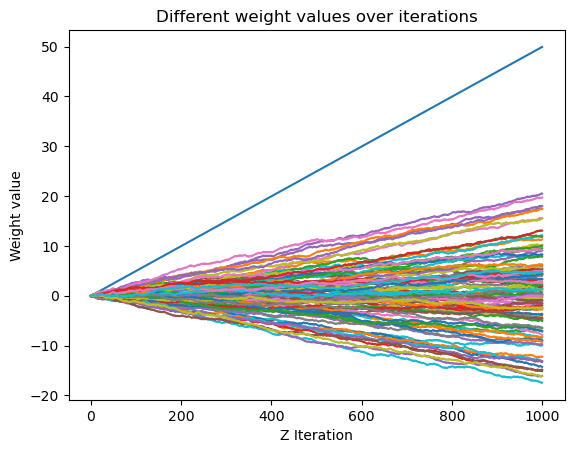

In [33]:
# Plot of the reconstruction success rate when the recall gives a final Hamming distance < 0.05 for K iterations
# This is only used to analyse the impact of modifying the diagonal of the weights matrix, mentionned in the appendix of the report
plt.figure('Exercise 1c Reconstruction')
plt.title('Recall reconstruction rate in function of number of patterns\nobtained from %i iterations'%K)
plot_error_rate = [None]*(K)
for k in range(K):
    plt.plot(Results_P_errors[k,:,0],P_success[k][:])
plt.axis([min(P),max(P),0,1])
plt.xlabel('Number of patterns')
plt.ylabel('Recall reconstruction success rate')
plt.show(block=False)

# Plot of the mean of the reconstruction success rate when the recall gives a final Hamming distance < 0.05
# This is only used to analyse the impact of modifying the diagonal of the weights matrix, mentionned in the appendix of the report
plt.figure('Exercise 1d Reconstruction')
plt.title('Recall reconstruction success rate average in function of number of patterns\nStatistical result')
plt.errorbar(P, Mean_P_success, yerr=Std_P_success, fmt='-o')
plt.axis([min(P)-1,max(P)+1,0,1])
plt.xlabel('Number of patterns')
plt.ylabel('Recall reconstruction success rate')
plt.show(block=False)

# Save results
np.savetxt('Results/Ex1Results.txt',Results)

# Plot of certain weight matrix indices over Z*c updates
# This is only used to analyse the impact of modifying the diagonal of the weights matrix, mentionned in the appendix of the report
plt.figure('Exercise 1 Weight')
plt.title('Different weight values over iterations')
weight_mem_plot = [[None] for i in range(hn.N)]
for j in range(0,hn.N,1):
    for i in range(len(weight_mem)):
        weight_mem_plot[j].append(weight_mem[i][j][0])
    plt.plot(weight_mem_plot[j])
plt.xlabel('Z Iteration')
plt.ylabel('Weight value')
plt.show(block=False)

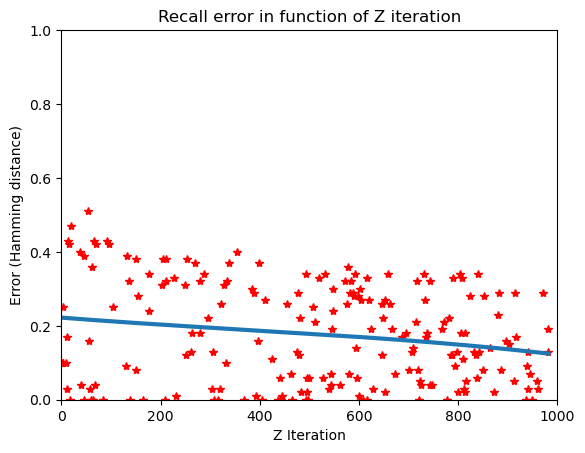

In [34]:
# Plot of the hamming distance over Z*c updates
# This is only used to analyse the impact of modifying the diagonal of the weights matrix, mentionned in the appendix of the report
plt.figure('Z - Hamming distance')
plt.title('Recall error in function of Z iteration')
distance_mem_plot = np.asarray(distance_mem)
plt.plot(distance_mem_plot[:,0],distance_mem_plot[:,1],'r*')
plt.xlabel('Z Iteration')
plt.ylabel('Error (Hamming distance)')
plt.axis([0,Z,0,1])

def func(x, a, b, c, d):
    return a*x**3+b*x**2+c*x+d
popt, pcov = curve_fit(func, distance_mem_plot[:,0], distance_mem_plot[:,1])
f = func(distance_mem_plot[:,0], *popt)
plt.plot(distance_mem_plot[:,0],f, linewidth=3)

plt.show(block=False)

ITERATION: 1 / 10
NUMBER OF PATTERNS 1
RECALLS: 203
ERROR AVERAGE; 0.0 %
SUCESS RATE: 100.0 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 2
RECALLS: 224
ERROR AVERAGE; 0.08482142857142853 %
SUCESS RATE: 99.55357142857143 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 3
RECALLS: 173
ERROR AVERAGE; 0.0 %
SUCESS RATE: 100.0 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 4
RECALLS: 182
ERROR AVERAGE; 0.2967032967032967 %
SUCESS RATE: 98.9010989010989 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 5
RECALLS: 204
ERROR AVERAGE; 0.7058823529411765 %
SUCESS RATE: 98.03921568627452 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 6
RECALLS: 187
ERROR AVERAGE; 0.8609625668449199 %
SUCESS RATE: 95.72192513368984 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 7
RECALLS: 201
ERROR AVERAGE; 0.9054726368159204 %
SUCESS RATE: 97.51243781094527 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 8
RECALLS: 210
ERROR AVERAGE; 3.523809523809521 %
SUCESS RATE: 84.28571428571429 %

ITERATION: 1 / 10
NUMBER OF PATTERNS 9
RECALLS: 208
ERROR AVERAGE; 1.7884615384

RECALLS: 210
ERROR AVERAGE; 2.4428571428571417 %
SUCESS RATE: 91.42857142857143 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 11
RECALLS: 197
ERROR AVERAGE; 3.4670050761421307 %
SUCESS RATE: 88.3248730964467 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 12
RECALLS: 204
ERROR AVERAGE; 4.1127450980392135 %
SUCESS RATE: 77.45098039215686 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 13
RECALLS: 189
ERROR AVERAGE; 11.306878306878314 %
SUCESS RATE: 53.439153439153436 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 14
RECALLS: 199
ERROR AVERAGE; 6.708542713567835 %
SUCESS RATE: 66.33165829145729 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 15
RECALLS: 201
ERROR AVERAGE; 6.611940298507456 %
SUCESS RATE: 65.67164179104478 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 16
RECALLS: 220
ERROR AVERAGE; 11.900000000000006 %
SUCESS RATE: 51.36363636363637 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 17
RECALLS: 214
ERROR AVERAGE; 9.317757009345797 %
SUCESS RATE: 54.67289719626168 %

ITERATION: 3 / 10
NUMBER OF PATTERNS 18
RECALLS: 200
ERROR 

RECALLS: 200
ERROR AVERAGE; 16.925000000000015 %
SUCESS RATE: 42.0 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 20
RECALLS: 200
ERROR AVERAGE; 19.095000000000017 %
SUCESS RATE: 25.5 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 21
RECALLS: 167
ERROR AVERAGE; 9.682634730538917 %
SUCESS RATE: 55.68862275449102 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 22
RECALLS: 213
ERROR AVERAGE; 19.258215962441337 %
SUCESS RATE: 26.291079812206572 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 23
RECALLS: 210
ERROR AVERAGE; 21.42380952380954 %
SUCESS RATE: 26.666666666666668 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 24
RECALLS: 209
ERROR AVERAGE; 21.49282296650716 %
SUCESS RATE: 25.83732057416268 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 25
RECALLS: 191
ERROR AVERAGE; 10.235602094240834 %
SUCESS RATE: 54.45026178010471 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 26
RECALLS: 206
ERROR AVERAGE; 21.830097087378633 %
SUCESS RATE: 23.78640776699029 %

ITERATION: 5 / 10
NUMBER OF PATTERNS 27
RECALLS: 177
ERROR AVERAGE; 17.090395480226

RECALLS: 183
ERROR AVERAGE; 20.704918032786892 %
SUCESS RATE: 30.601092896174862 %

ITERATION: 7 / 10
NUMBER OF PATTERNS 29
RECALLS: 205
ERROR AVERAGE; 27.312195121951223 %
SUCESS RATE: 8.292682926829269 %

ITERATION: 7 / 10
NUMBER OF PATTERNS 30
RECALLS: 215
ERROR AVERAGE; 30.399999999999988 %
SUCESS RATE: 12.55813953488372 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 1
RECALLS: 198
ERROR AVERAGE; 0.0505050505050505 %
SUCESS RATE: 99.4949494949495 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 2
RECALLS: 194
ERROR AVERAGE; 0.0 %
SUCESS RATE: 100.0 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 3
RECALLS: 189
ERROR AVERAGE; 0.1058201058201058 %
SUCESS RATE: 98.94179894179894 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 4
RECALLS: 215
ERROR AVERAGE; 0.1395348837209302 %
SUCESS RATE: 98.6046511627907 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 5
RECALLS: 189
ERROR AVERAGE; 0.03703703703703701 %
SUCESS RATE: 100.0 %

ITERATION: 8 / 10
NUMBER OF PATTERNS 6
RECALLS: 214
ERROR AVERAGE; 0.06542056074766356 %
SUCESS RATE

RECALLS: 196
ERROR AVERAGE; 0.6377551020408164 %
SUCESS RATE: 96.42857142857143 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 8
RECALLS: 184
ERROR AVERAGE; 2.6521739130434776 %
SUCESS RATE: 90.76086956521739 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 9
RECALLS: 198
ERROR AVERAGE; 6.560606060606057 %
SUCESS RATE: 71.21212121212122 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 10
RECALLS: 195
ERROR AVERAGE; 3.2512820512820495 %
SUCESS RATE: 85.12820512820512 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 11
RECALLS: 199
ERROR AVERAGE; 1.949748743718593 %
SUCESS RATE: 84.92462311557789 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 12
RECALLS: 194
ERROR AVERAGE; 1.8453608247422648 %
SUCESS RATE: 93.29896907216495 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 13
RECALLS: 217
ERROR AVERAGE; 3.2857142857142847 %
SUCESS RATE: 84.33179723502305 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 14
RECALLS: 213
ERROR AVERAGE; 5.3755868544600895 %
SUCESS RATE: 73.2394366197183 %

ITERATION: 10 / 10
NUMBER OF PATTERNS 15
RECALLS: 202


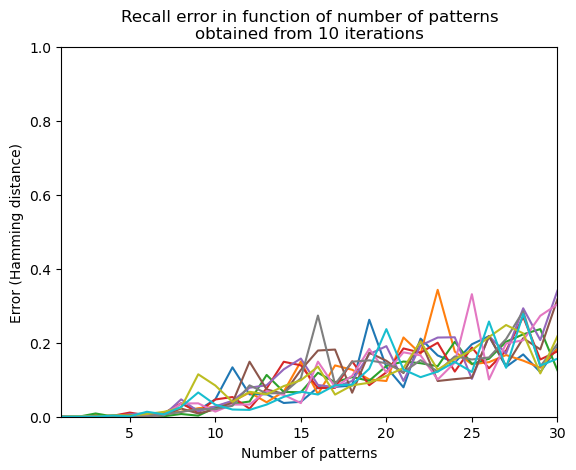

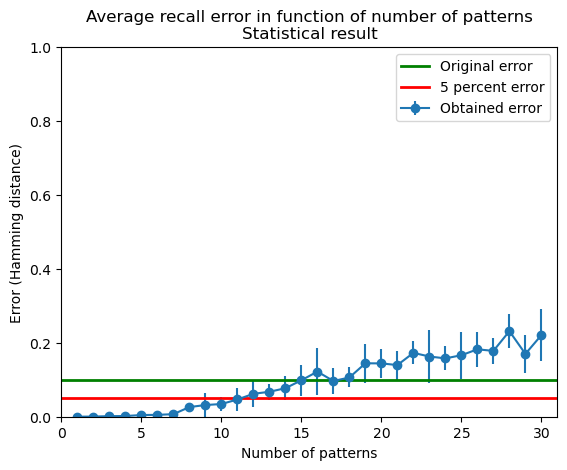

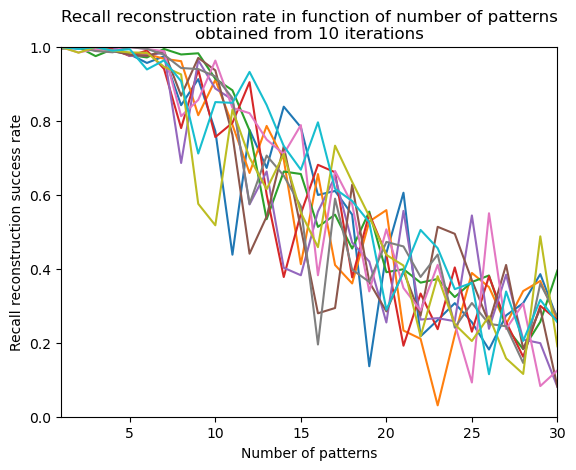

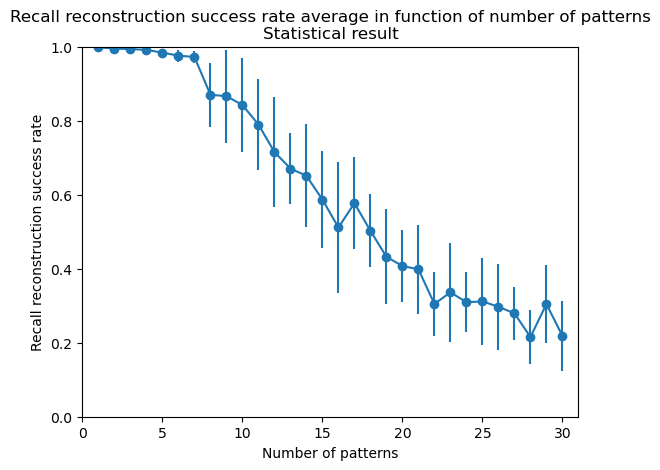

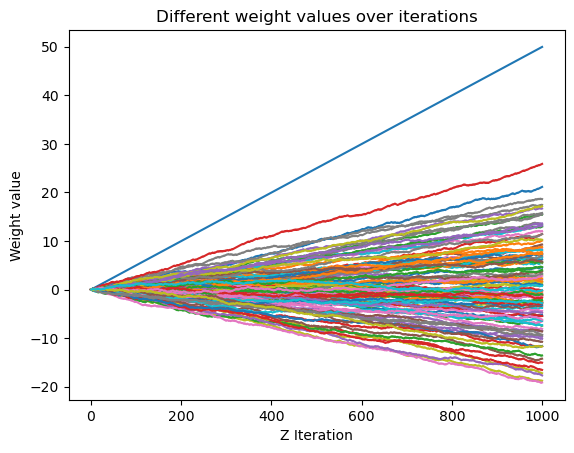

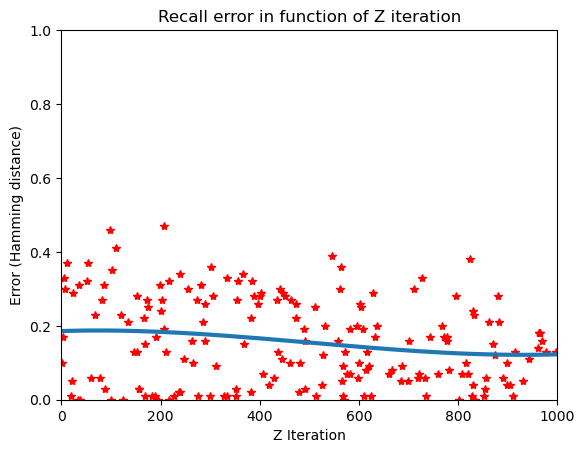

In [35]:
with open('Exercises/Exercise1.py', "rb") as source_file:
    code = compile(source_file.read(), 'Exercises/Exercise1.py', "exec")
exec(code)

# -------------------------------------
# -------------------------------------
# -------------------------------------

In [37]:
p

13.5

In [36]:
# Exercise 2

print('\nEXERCISE 2\n===========\n')

# Network size
N = range(100,1000+1,10) # size of the network, i.e. if N=10 it will consists of 10x10 pixels

# Random patterns
ratio = 0.5 # probability of a pixel being 1 instead of -1

# Updates
decay = 1.0

# Steps
Z = 1000 # Number of storage/recall iterations
c = 5

# Storage and recalls
P_s = 0.8 # Probability ps for storage
P_f = 0.1 # ratio of flipped pixels

# Exercise parameters
error_max = 0.05
P_init = 27

# execfile('Exercises/Exercise2.py')
with open('Exercises/Exercise2.py', "rb") as source_file:
    code = compile(source_file.read(), 'Exercises/Exercise2.py', "exec")
exec(code)
# -------------------------------------
# -------------------------------------
# -------------------------------------


EXERCISE 2

Number of fully interconnected units: 100
Testing for 27 patterns with Pmin = 0 and Pmax = 0
Maximum error crossed for 27 patterns


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
# Exercise 3

print('\nEXERCISE 3\n===========\n')

# Network size
N = 100 # size of the network, i.e. if N=10 it will consists of 10x10 pixels

# Random patterns
p = 100 # Total number of patterns that will be stored
ratio = 0.5 # probability of a pixel being 1 instead of -1

# Updates
Decay = range(0,1000+1,1) # Decay multiplied by resolution
resolution = 0.001 # Multiplied to the values of Decay

# Steps
Z = 1000 # Number of storage/recall iterations
c = 5

# Storage and recalls
P_s = 0.8 # Probability ps for storage
P_f = 0.1 # ratio of flipped pixels

# Exercise parameters
T_window = 20
m = 5

# execfile('Exercises/Exercise3.py')
with open('Exercises/Exercise3.py', "rb") as source_file:
    code = compile(source_file.read(), 'Exercises/Exercise3.py', "exec")
exec(code)

# -------------------------------------
# -------------------------------------
# -------------------------------------

In [ ]:
# Exercise 4

print('\nEXERCISE 4\n===========\n')

# Network size
N = 100 # size of the network, i.e. if N=10 it will consists of 10x10 pixels

# Random patterns
p = 100 # Total number of patterns that will be stored
ratio = 0.5 # probability of a pixel being 1 instead of -1

# Updates
Decay = range(0,1000+1,1) # Decay multiplied by resolution
resolution = 0.001 # Multiplied to the values of Decay

# Steps
Z = 1000 # Number of storage/recall iterations
c = 5

# Storage and recalls
P_s = 0.8 # Probability ps for storage
P_f = 0.1 # ratio of flipped pixels

# Exercise parameters
T_window = 20
M = range(2,15+1,1)

# execfile('Exercises/Exercise4.py')
with open('Exercises/Exercise4.py', "rb") as source_file:
    code = compile(source_file.read(), 'Exercises/Exercise4.py', "exec")
exec(code)

# -------------------------------------
# -------------------------------------
# -------------------------------------

end = time.time()
print('Elapsed time:', end-start, 'seconds')